<a href="https://colab.research.google.com/github/msamunetogetoge/masamune/blob/master/hotelingT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ホテリング理論(1次元)

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import pandas as pd

In [2]:
X=pd.read_csv("Davis.csv")
X.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


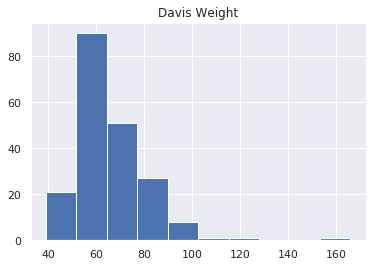

In [3]:
x=X["weight"]
x.hist()
plt.title("Davis Weight")
plt.savefig("davis.png")

In [0]:
mu = np.mean(x)
N=len(x)
sig =(np.sum( (x-mu)**2 ))/N
sig = np.sqrt(sig)

In [5]:
import scipy.stats as stats
a_th =stats.chi2.ppf(q=0.95, df=1)
print(a_th)

3.841458820694124


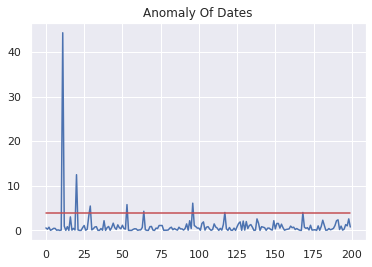

In [6]:
a = ( (x- mu)/sig )**2
plt.plot(a)
plt.plot(a_th*np.ones(len(a)), c="r")
plt.title("Anomaly Of Dates")
plt.savefig("anomaly_davis.png")

In [0]:
anomaly = x[a>a_th].index

In [17]:
X.loc[anomaly]

,sex,weight,height,repwt,repht
11,F,166,57,56.0,163.0
20,M,119,180,124.0,178.0
29,M,101,183,100.0,180.0
53,M,102,185,107.0,185.0
64,M,97,189,98.0,185.0
96,M,103,185,101.0,182.0
117,M,96,184,94.0,183.0
168,M,96,191,95.0,188.0


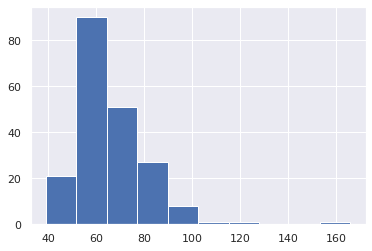

In [8]:
x.hist()

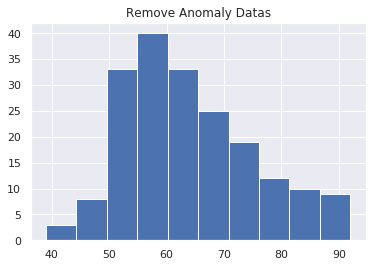

In [9]:
X = X.drop(index= anomaly)
x = X["weight"]
x.hist()
plt.title("Remove Anomaly Datas")
plt.savefig("Davis_hist2.png")

In [0]:
mu = np.mean(x)
N=len(x)
sig =(np.sum( (x-mu)**2 ))/N
sig = np.sqrt(sig)

In [11]:
import scipy.stats as stats
a_th =stats.chi2.ppf(q=0.95, df=1)
print(a_th)

3.841458820694124


Text(0.5, 1.0, 'Anomaly Of Dates')

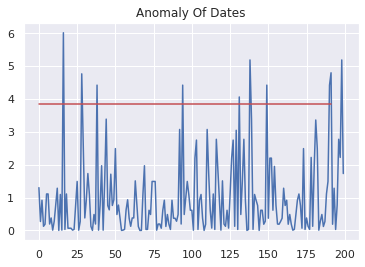

In [12]:
a = ( (x- mu)/sig )**2
plt.plot(a)
plt.plot(a_th*np.ones(len(a)), c="r")
plt.title("Anomaly Of Dates")

In [0]:
anomaly = x[a>a_th].index

In [14]:
X.loc[anomaly]

,sex,weight,height,repwt,repht
16,M,92,187,101.0,185.0
28,F,39,157,41.0,153.0
38,M,88,178,86.0,175.0
94,M,88,189,87.0,185.0
131,M,87,185,89.0,185.0
138,M,90,188,91.0,185.0
149,M,88,184,86.0,183.0
190,M,88,185,93.0,188.0
191,M,89,173,86.0,173.0
198,M,90,181,91.0,178.0


#ホテリング理論(多次元)

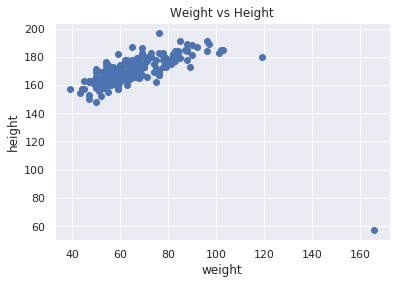

In [16]:
X=pd.read_csv("Davis.csv")
x= X[["weight", "height"]]
plt.scatter(x["weight"], x["height"])
plt.title("Weight vs Height")
plt.xlabel("weight")
plt.ylabel("height")
plt.savefig("weight_vs_height.png")

In [0]:
mu = np.mean(x)
N=len(x)
M=len(x.columns)
Sig = np.dot((x-mu).T,(x-mu) )/N

In [18]:
import scipy.stats as stats
a_th =stats.chi2.ppf(q=0.95, df=M)
print(a_th)

5.991464547107979


In [19]:
a = np.dot( np.dot((x-mu), np.linalg.inv(Sig)), (x-mu).T ).diagonal()
a.shape

(200,)

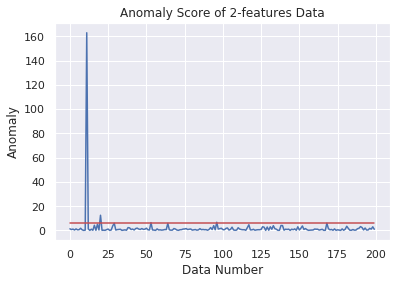

In [20]:
plt.plot(a)
plt.plot(a_th*np.ones(len(x)),c="r")
plt.title("Anomaly Score of 2-features Data")
plt.xlabel("Data Number")
plt.ylabel("Anomaly")
plt.savefig("2-features_anomaly.png")

In [0]:
anomaly = x[a>a_th].index

In [21]:
X.loc[anomaly]

,sex,weight,height,repwt,repht
11,F,166,57,56.0,163.0
20,M,119,180,124.0,178.0
53,M,102,185,107.0,185.0
96,M,103,185,101.0,182.0
